In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
from tqdm import tqdm
import operator
import time
import pandas as pd

sns.set()

%matplotlib inline

In [30]:
import warnings
warnings.simplefilter("ignore")

### Topic: Male vs. Female

In [31]:
def topic_male_vs_female(channel):
    topics = {}
    for topic in ['Other', 'Politics', 'Media', 'Fashion', 'Foreign Policy', 'Immigration', 
         'Economy', 'Health', 'Art', 'Gender', 'Sport', 'Violence', 'Climate']:
        topics[topic] = {'count': 0, 'male': 0, 'female': 0, 'ratio': 0,
                         'male_number': [0, 0, 0, 0, 0], 'female_number': [0, 0, 0, 0, 0],
                        'male_total_ratio': [], 'conditional_male_total_ratio': []} #1, 2, 3, 4, 5
    
    all_files = glob.glob('processed_data/%s/*.p'%channel)
    
    for file in all_files:
        data = pickle.load(open(file, 'rb'))
        for key in data.keys():
            topic = data[key]['Topics'][0]
            topics[topic]['count'] += 1
            if data[key]['gender'] is not None:
                for elements in data[key]['gender']:
                    if elements == 'm':
                        topics[topic]['male'] += 1
                    else:
                        topics[topic]['female'] += 1

                all_genders = np.array(data[key]['gender'])
                num_men = all_genders[all_genders=='m'].shape[0]
                num_female = all_genders[all_genders=='f'].shape[0]
                topics[topic]['male_total_ratio'].append(num_men/(num_men + num_female))
                if num_men + num_female >= 3:
                    topics[topic]['conditional_male_total_ratio'].append(num_men/(num_men + num_female))
                if len(all_genders) == 1:
                        continue
                if num_men > 0:
                    num_men = min(num_men-1, 4)
                    topics[topic]['male_number'][num_men] += 1
                if num_female > 0:
                    num_female = min(num_female-1, 4)
                    topics[topic]['female_number'][num_female] += 1

#             topic = data[key]['Topics'][1]
            
#             if data[key]['gender'] is not None:
#                 for elements in data[key]['gender']:
#                     if elements == 'm':
#                         topics[topic]['male'] += 1
#                     else:
#                         topics[topic]['female'] += 1
            
    for key in topics.keys():
        if topics[key]['female'] == 0:
            topics[key]['ratio'] = None
            continue
        topics[key]['ratio'] = topics[key]['male']/(topics[key]['female'] + topics[key]['male'])
        
    total_male = 0; total_female = 0;
    for key in topics.keys():
        total_male += topics[key]['male']
        total_female += topics[key]['female']
    topics['Total'] = {'male': total_male, 'female': total_female, 'ratio': total_male/total_female}
    
    return topics

In [32]:
CHANNELS = ["CNN", "FOX", "MSNBC"]
all_topics = ['Politics', 'Sport', 'Media', 'Fashion', 'Immigration', 
     'Economy', 'Health', 'Art', 'Gender', 'Climate']

In [33]:
dfs = []
for channel in CHANNELS:
    st = time.time()
    channel_dict = topic_male_vs_female(channel)
    df_channel = pd.DataFrame.from_dict(channel_dict, orient="index")
    df_channel["topic"] = df_channel.index
    df_channel["channel"] = channel
    df_channel["mean_conditional_ratio"] = [np.mean(x) for x in df_channel["conditional_male_total_ratio"].values]
    df_channel["mean_ratio"] = [np.mean(x) for x in df_channel["male_total_ratio"].values]
    df_channel = df_channel.reset_index()
    dfs.append(df_channel)
    print(channel, " in ", time.time() - st, "s")
    

CNN  in  17.881983041763306 s
FOX  in  15.828446865081787 s
MSNBC  in  17.718429803848267 s


In [34]:
df = pd.concat(dfs, ignore_index=True)

In [35]:
df

,index,count,male,female,ratio,male_number,female_number,male_total_ratio,conditional_male_total_ratio,topic,channel,mean_conditional_ratio,mean_ratio
0,Art,5486.0,4509,1924,0.700917,"[470, 668, 199, 54, 33]","[621, 205, 35, 11, 7]","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.5, ...","[1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.666...",Art,CNN,0.691576,0.706267
1,Climate,15850.0,14192,5482,0.721358,"[1290, 1794, 536, 242, 213]","[1755, 491, 119, 28, 30]","[0.0, 0.0, 1.0, 0.375, 1.0, 0.5, 0.0, 1.0, 1.0...","[0.375, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.333333...",Climate,CNN,0.740843,0.720897
2,Economy,3066.0,291,176,0.623126,"[33, 50, 6, 4, 2]","[46, 17, 3, 2, 0]","[1.0, 0.0, 1.0, 1.0, 0.6666666666666666, 0.0, ...","[0.6666666666666666, 1.0, 0.3333333333333333, ...",Economy,CNN,0.651429,0.608609
3,Fashion,932.0,326,159,0.672165,"[42, 45, 8, 5, 3]","[45, 14, 1, 2, 0]","[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.3333333333333333, 1.0, 0.2, 0.6666666666666...",Fashion,CNN,0.713333,0.659561
4,Foreign Policy,3.0,1,0,NaN,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",[1.0],[],Foreign Policy,CNN,NaN,1.000000
5,Gender,1493.0,1343,532,0.716267,"[137, 177, 53, 23, 10]","[179, 52, 12, 2, 6]","[1.0, 1.0, 1.0, 1.0, 0.4, 1.0, 1.0, 0.33333333...","[0.4, 0.3333333333333333, 0.16666666666666666,...",Gender,CNN,0.704560,0.735373
6,Health,18440.0,13185,5903,0.690748,"[1448, 1928, 469, 158, 126]","[1828, 603, 96, 31, 21]","[1.0, 1.0, 0.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, ...","[0.5, 0.6666666666666666, 0.6666666666666666, ...",Health,CNN,0.689992,0.689359
7,Immigration,17163.0,12327,5495,0.691673,"[1262, 1750, 448, 162, 131]","[1678, 548, 106, 32, 20]","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.6666666666666...","[0.6666666666666666, 0.6666666666666666, 1.0, ...",Immigration,CNN,0.688747,0.690472
8,Media,13412.0,12216,5215,0.700820,"[1265, 1890, 489, 171, 101]","[1739, 559, 109, 33, 14]","[1.0, 0.5, 1.0, 1.0, 0.5, 0.8, 0.6666666666666...","[0.8, 0.6666666666666666, 1.0, 1.0, 1.0, 0.75,...",Media,CNN,0.681864,0.705572
9,Other,169080.0,124544,55688,0.691020,"[13400, 17693, 4613, 1604, 1148]","[17372, 5873, 1012, 293, 173]","[1.0, 1.0, 0.5, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 0.6666666666666666, 1.0, 0.6, 0.66666666...",Other,CNN,0.687052,0.692370


# -1
Ratio of each topic.

In [36]:
# Computed total by channel to normalize
total = 0
for channel in CHANNELS:
    idx = df[df.topic=="Total"][df.channel == channel].index[0]
    total = np.sum(df[df.channel == channel][df.topic.isin(all_topics)]["count"].values)
    print(channel, idx, total)
    df.loc[idx, "count"] = total
    
    for topic in df[df.channel == channel].topic:
        idx = df[df.topic==topic][df.channel == channel].index[0]
        df.loc[idx, "normalized_count"] = df.loc[idx, "count"] / total #_without_other

CNN 12 193516.0
FOX 26 166699.0
MSNBC 40 177899.0


# 0.
Ratio in each topic, normalized by mean of the channel.
PS : I think we need to normalize by each channel for data to be meaningful, happy to discuss if someone disagrees!

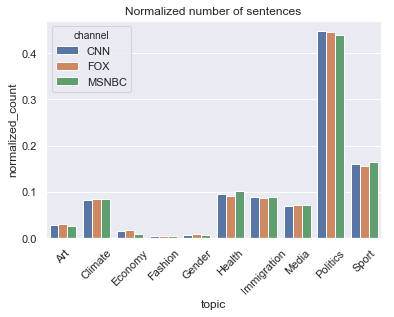

In [37]:
sns.barplot(data=df[df.topic.isin(all_topics)], hue="channel", y="normalized_count", x="topic", orient="v")
plt.title("Normalized number of sentences")
plt.xticks(rotation=45);

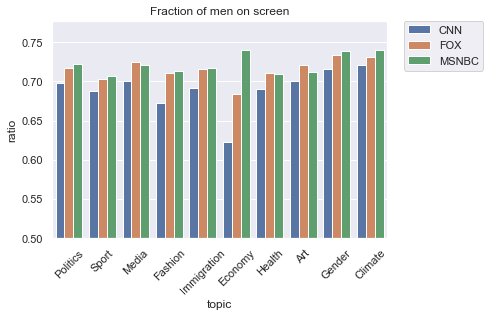

In [28]:
sns.set_color_codes("pastel") #
sns.barplot(data=df[df.topic.isin(all_topics)], hue="channel", y="ratio", x="topic", order=all_topics, orient="v")
plt.xticks(rotation=45);
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.5, None]);
plt.title("Fraction of men on screen")
plt.savefig("gender_topic.png", dpi=900)

# 1.
Male/(Male + Female) distribution. Question: Is it the case that it's mostly men, mostly women of it is usually mixed?  

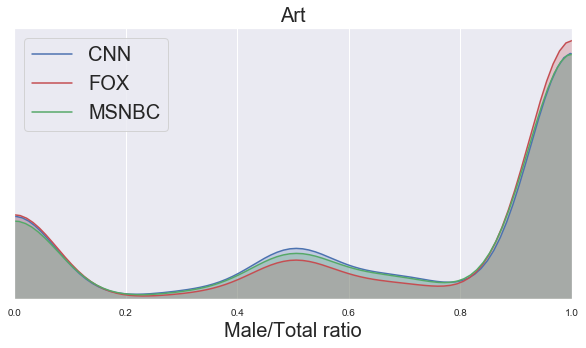

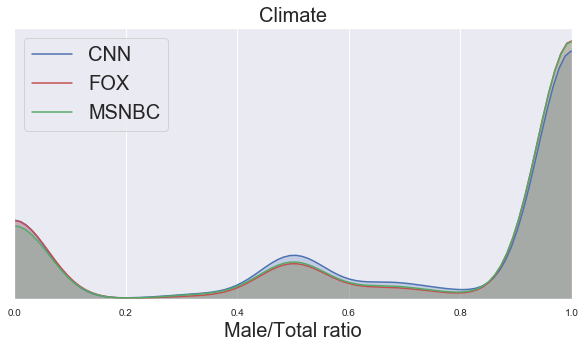

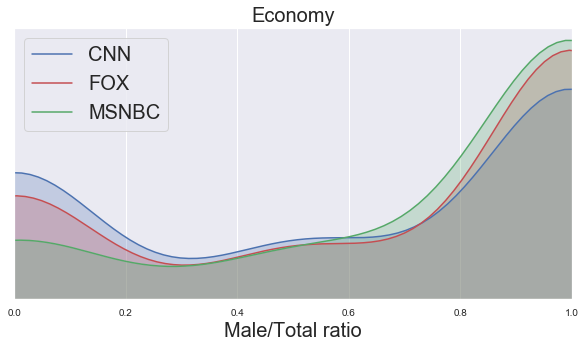

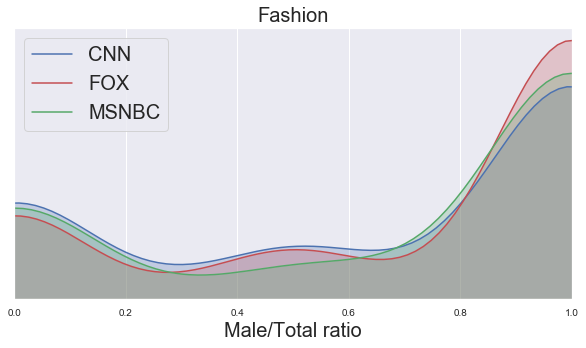

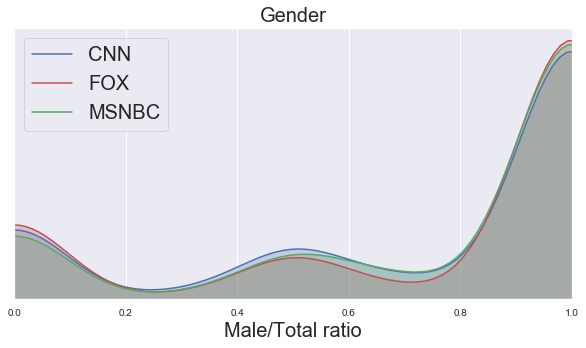

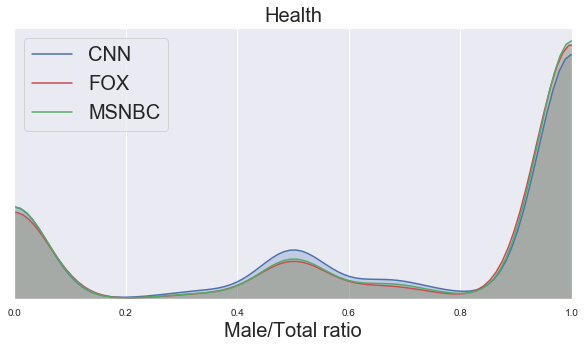

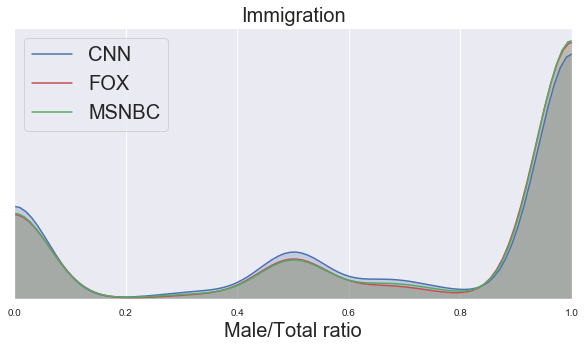

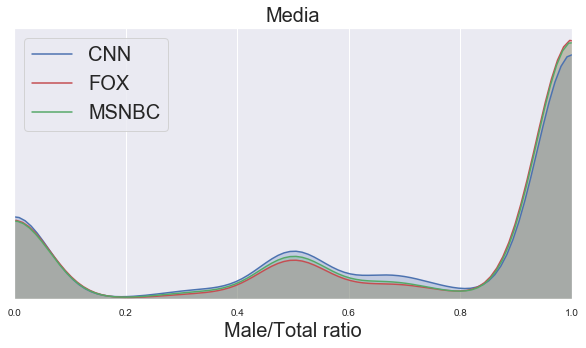

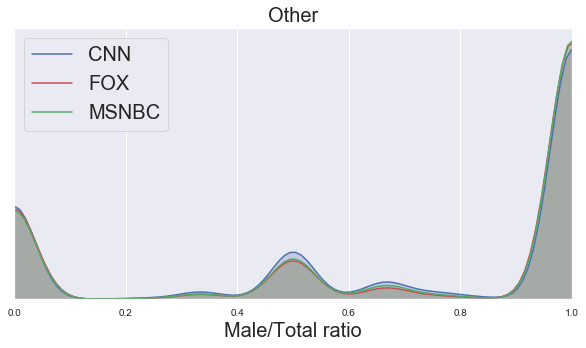

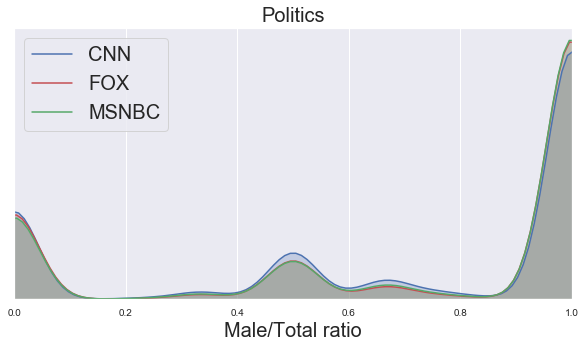

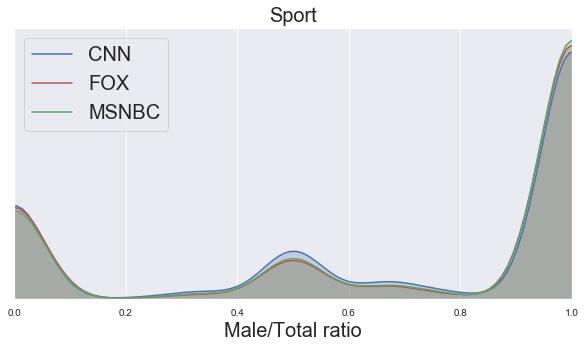

In [42]:
for key in df.topic.unique():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[df.channel=="CNN"][df.topic==key].male_total_ratio.values[0],  label="CNN", 
                                              color='b', shade=True)
    sns.kdeplot(df[df.channel=="FOX"][df.topic==key].male_total_ratio.values[0],  label="FOX", 
                                              color='r', shade=True)
    sns.kdeplot(df[df.channel=="MSNBC"][df.topic==key].male_total_ratio.values[0],  label="MSNBC", 
                                              color='g', shade=True)
    plt.legend(fontsize = 20)
    plt.title(key, fontsize = 20)
    plt.xlabel("Male/Total ratio", fontsize=20)
    plt.xticks(fontsize=10)
    plt.yticks(())
    plt.xlim([0, 1])

# 2.
Male/(Male + Female) distribution. Question: Is it the case that it's mostly men, mostly women of it is usually mixed?  

Same but now distribution is conditional on number of people >= 3: So when they are alot of people on the screen, how is the ratio?

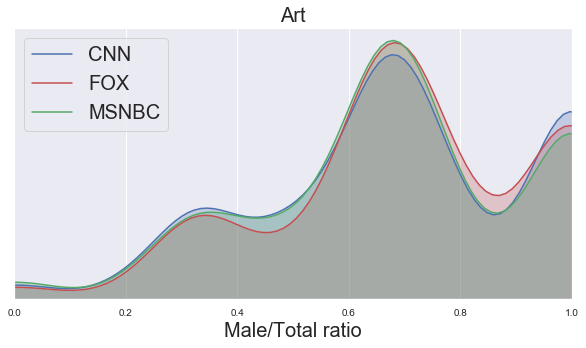

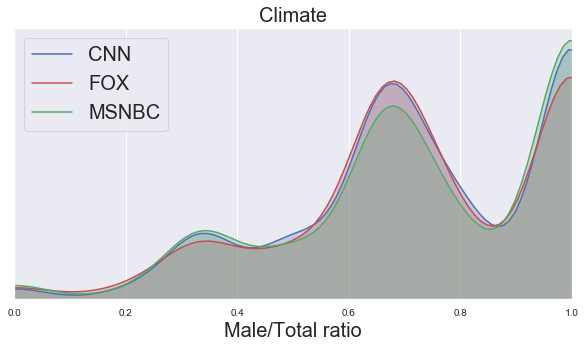

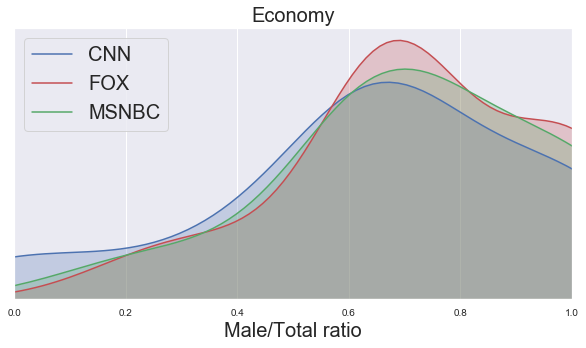

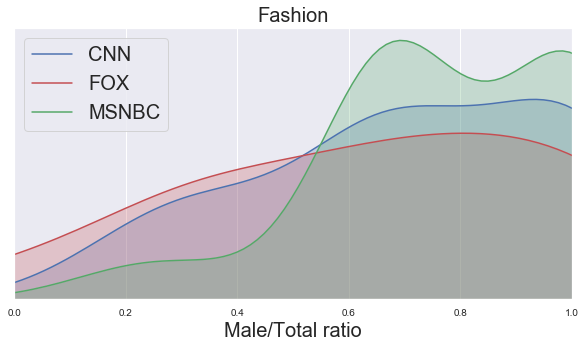

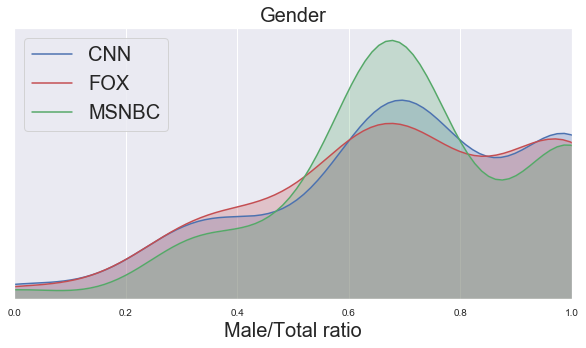

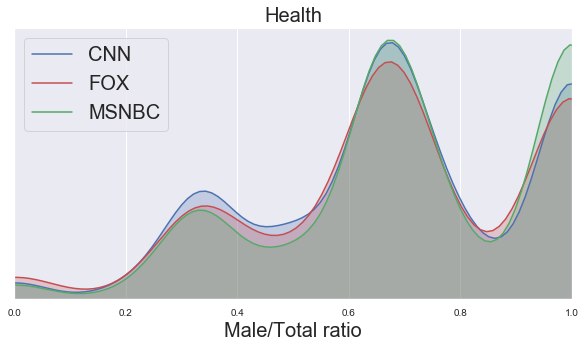

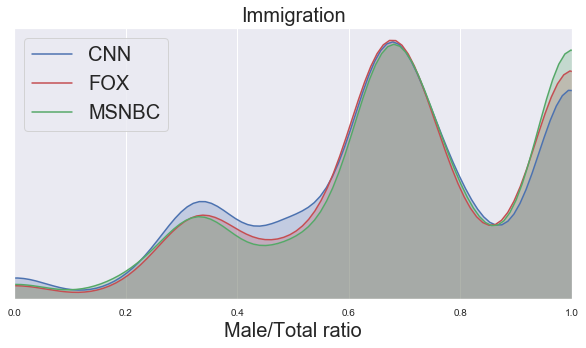

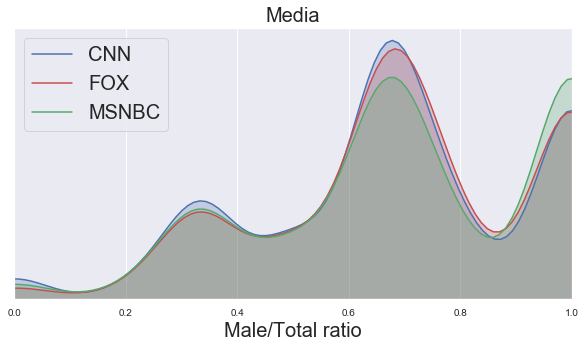

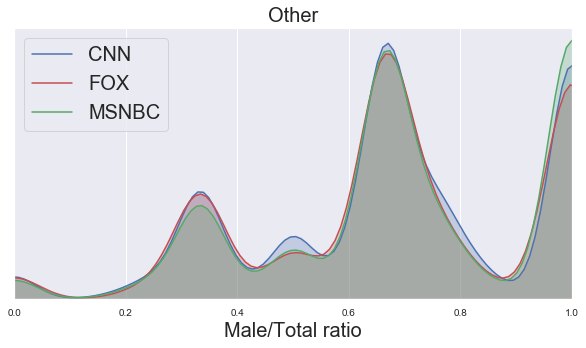

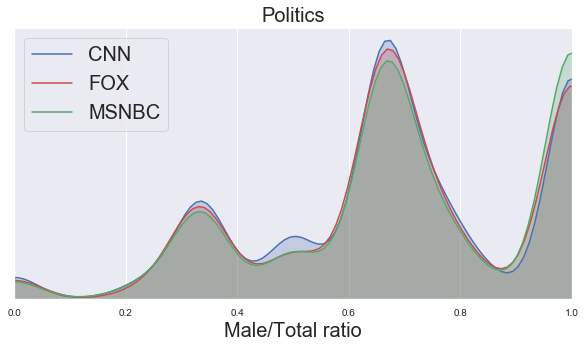

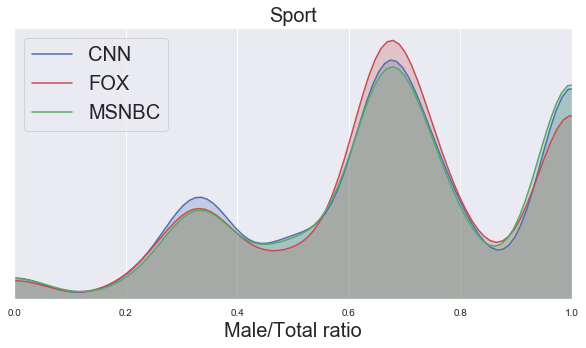

In [43]:
for key in df.topic.unique():
    if key == 'Total' or key == 'Foreign Policy' or key == 'Violence':
        continue
    plt.figure(figsize=(10,5))
    sns.kdeplot(df[df.channel=="CNN"][df.topic==key].conditional_male_total_ratio.values[0],  label="CNN", 
                                              color='b', shade=True)
    sns.kdeplot(df[df.channel=="FOX"][df.topic==key].conditional_male_total_ratio.values[0],  label="FOX", 
                                              color='r', shade=True)
    sns.kdeplot(df[df.channel=="MSNBC"][df.topic==key].conditional_male_total_ratio.values[0],  label="MSNBC", 
                                              color='g', shade=True)
    plt.legend(fontsize = 20)
    plt.title(key, fontsize=20)
    plt.xlabel("Male/Total ratio", fontsize=20)
    plt.yticks(())
    plt.xticks(fontsize=10)
    plt.xlim([0, 1])